In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding="latin-1")

#convert the streams data to numberic
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

#sort the data by stream and keep the dataframe sort by streams
df.sort_values(by='streams', inplace=True , ascending=False)

#list the top 10
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2.713922e+09,433,...,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2.665344e+09,492,...,170,C#,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2.594040e+09,250,...,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2.591224e+09,315,...,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2.565530e+09,281,...,186,G,Major,68,49,59,16,0,13,28


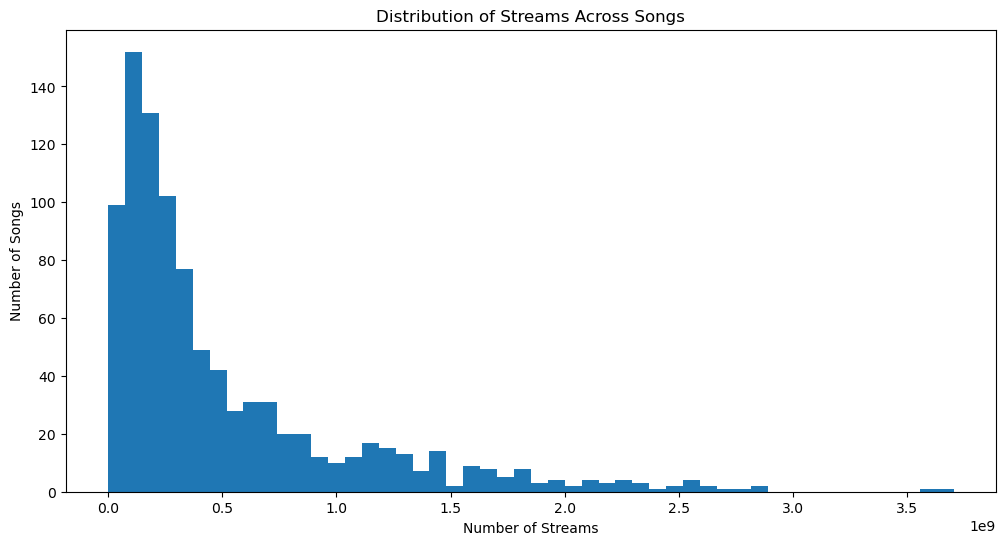

In [3]:
plt.figure(figsize=(12, 6))
plt.hist(df['streams'], bins=50, log=False)
plt.xlabel('Number of Streams')
plt.ylabel('Number of Songs')
plt.title('Distribution of Streams Across Songs')
plt.show()


Total Songs: 953
Years Spanned: 93 years


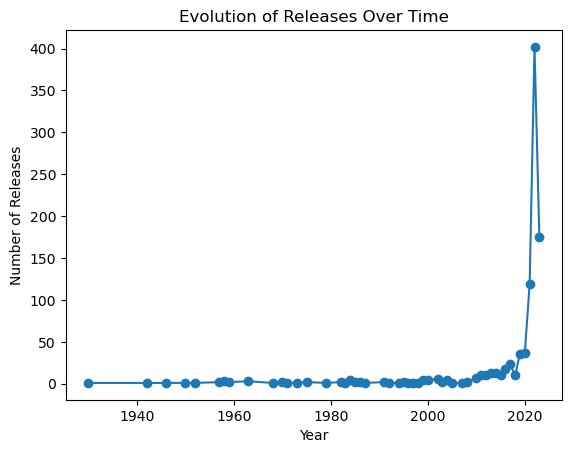

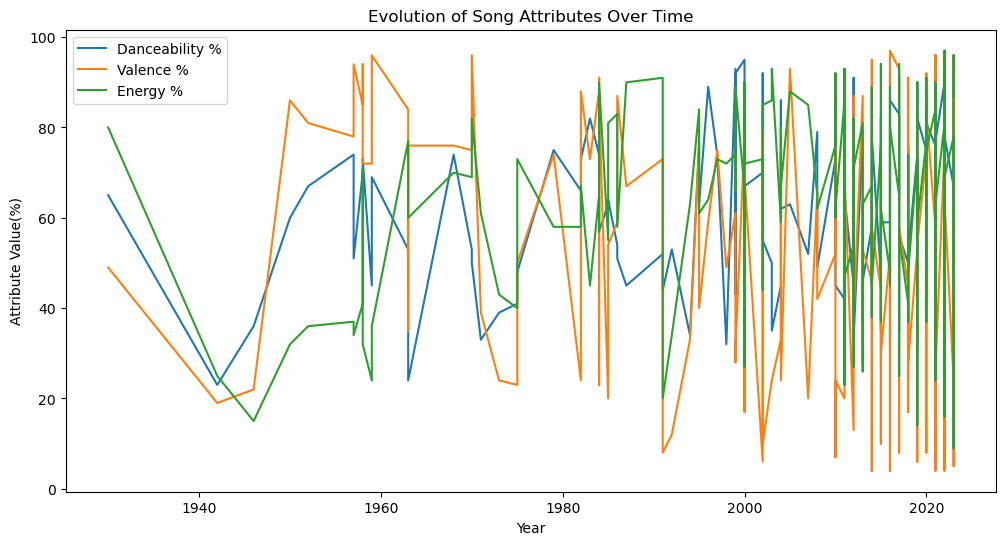

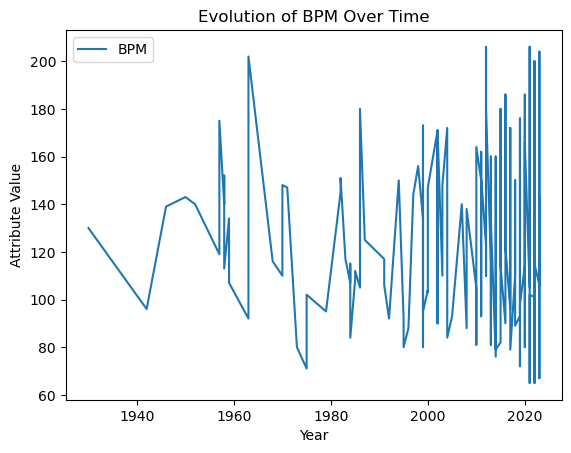

In [4]:
total_songs = len(df)
years_spanned = df['released_year'].max() - df['released_year'].min()

print(f"Total Songs: {total_songs}")
print(f"Years Spanned: {years_spanned} years")


releases_per_year = df.groupby('released_year')['track_name'].count()
plt.plot(releases_per_year.index, releases_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Evolution of Releases Over Time')
plt.show()


df.sort_values(by=["released_year"], ascending=True, inplace=True)
plt.figure(figsize=(12, 6))

plt.plot(df['released_year'], df['danceability_%'], label='Danceability %')
plt.plot(df['released_year'], df['valence_%'], label='Valence %')
plt.plot(df['released_year'], df['energy_%'], label='Energy %')
plt.xlabel('Year')
plt.ylabel('Attribute Value(%)')
plt.title('Evolution of Song Attributes Over Time')
plt.legend()
plt.show()


plt.plot(df['released_year'], df['bpm'], label='BPM')
plt.xlabel('Year')
plt.ylabel('Attribute Value')
plt.title('Evolution of BPM Over Time')
plt.legend()
plt.show()

**Exploratory Data Analysis (EDA)**

In [5]:
attribute_stats = df[['bpm', 'danceability_%', 'valence_%', 'energy_%']].describe()
print(attribute_stats)


              bpm  danceability_%   valence_%    energy_%
count  953.000000       953.00000  953.000000  953.000000
mean   122.540399        66.96957   51.431270   64.279119
std     28.057802        14.63061   23.480632   16.550526
min     65.000000        23.00000    4.000000    9.000000
25%    100.000000        57.00000   32.000000   53.000000
50%    121.000000        69.00000   51.000000   66.000000
75%    140.000000        78.00000   70.000000   77.000000
max    206.000000        96.00000   97.000000   97.000000


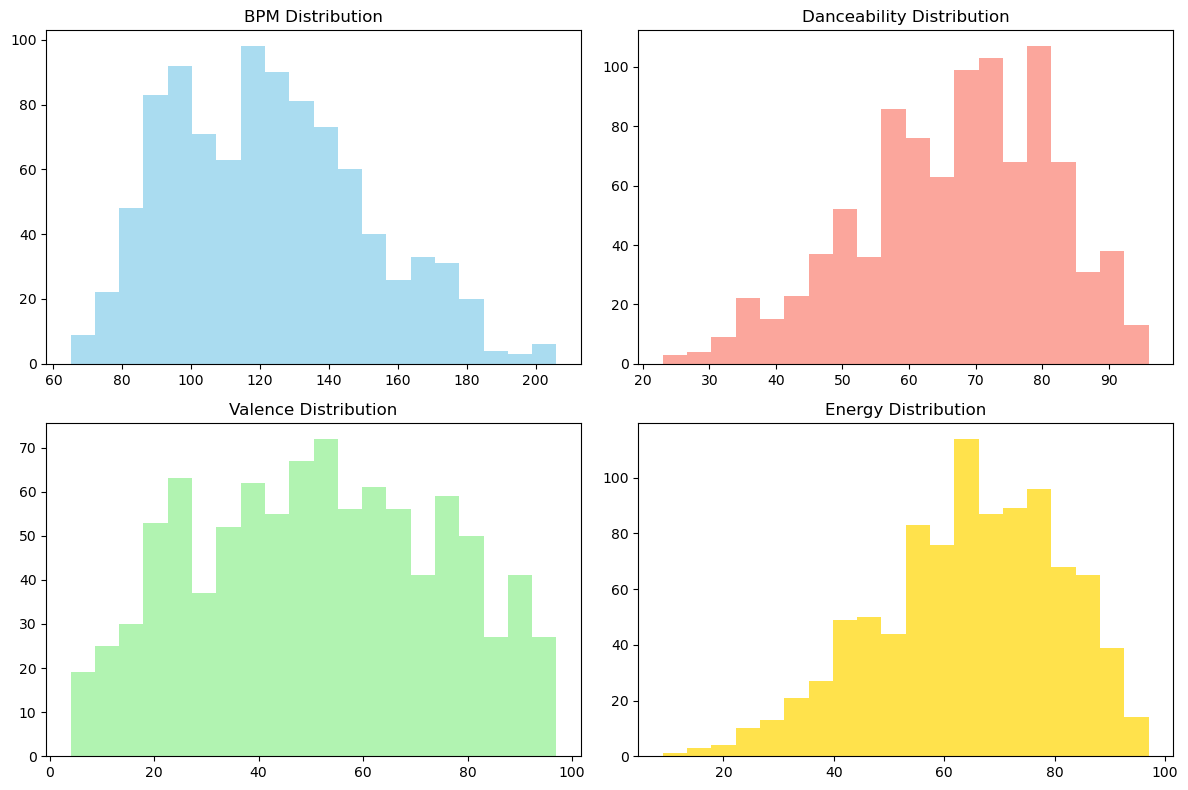

In [6]:
# Create histograms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df['bpm'], bins=20, color='skyblue', alpha=0.7)
plt.title('BPM Distribution')

plt.subplot(2, 2, 2)
plt.hist(df['danceability_%'], bins=20, color='salmon', alpha=0.7)
plt.title('Danceability Distribution')

plt.subplot(2, 2, 3)
plt.hist(df['valence_%'], bins=20, color='lightgreen', alpha=0.7)
plt.title('Valence Distribution')

plt.subplot(2, 2, 4)
plt.hist(df['energy_%'], bins=20, color='gold', alpha=0.7)
plt.title('Energy Distribution')

plt.tight_layout()
plt.show()

Danceability and Energy 

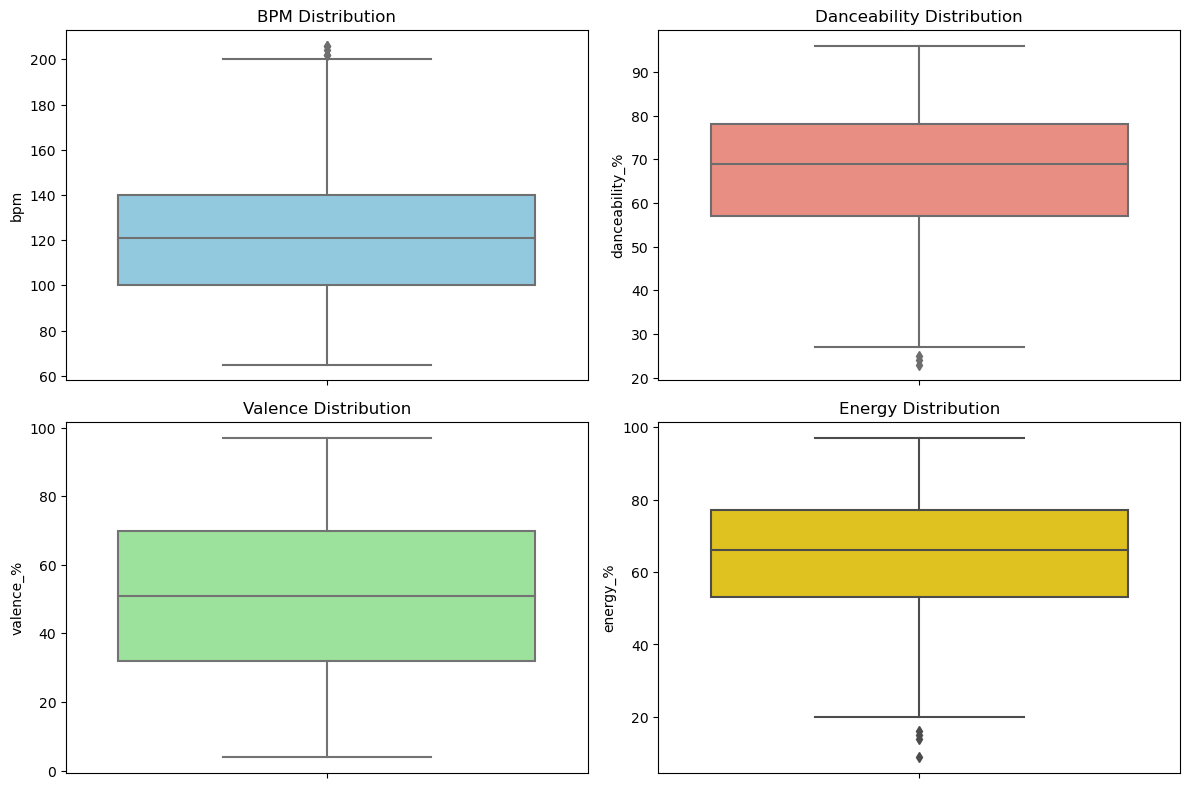

In [7]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, y='bpm', color='skyblue')
plt.title('BPM Distribution')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, y='danceability_%', color='salmon')
plt.title('Danceability Distribution')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, y='valence_%', color='lightgreen')
plt.title('Valence Distribution')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, y='energy_%', color='gold')
plt.title('Energy Distribution')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


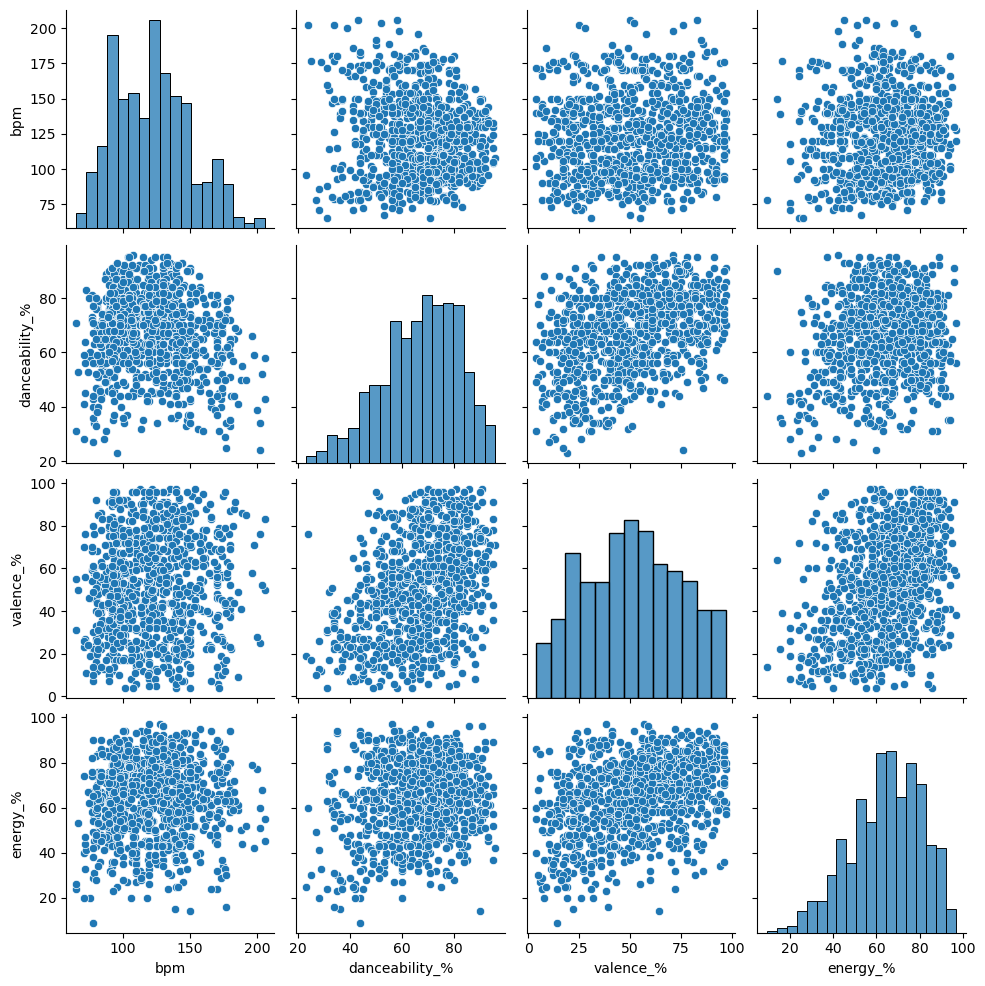

In [8]:
sns.pairplot(df[['bpm', 'danceability_%', 'valence_%', 'energy_%']])
plt.show()

#(removeable)

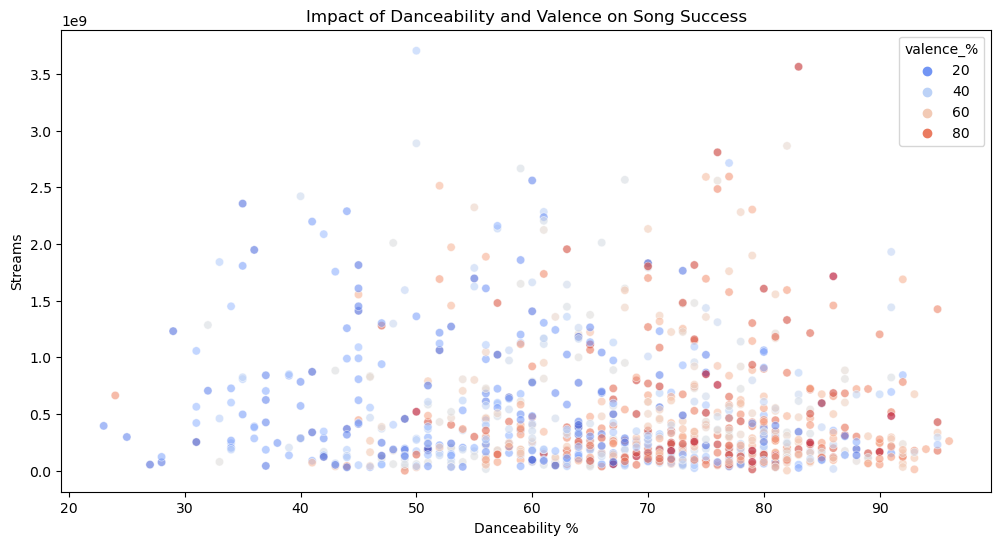

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='danceability_%', y='streams', hue='valence_%', palette='coolwarm', alpha=0.6)
plt.xlabel('Danceability %')
plt.ylabel('Streams')
plt.title('Impact of Danceability and Valence on Song Success')
plt.show()


In [10]:

import plotly.graph_objects as go

#sorces: https://www.kaggle.com/code/jrmistry/plotly-how-to-change-plot-data-using-dropdowns?scriptVersionId=25944108&cellId=8

# Select columns for audio features and popularity
audio_features_columns = [ 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'speechiness_%']
popularity_column = 'streams'

fig = go.Figure()

for atttibute in audio_features_columns:
    fig.add_trace(
    
        go.Scatter(
            x = df[popularity_column],
            y = df[atttibute],
            name = atttibute
        )
    
    )


fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'All',
                  method = 'update',
            
                  #visibility corresponding to [ 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'speechiness_%']
                  args = [{'visible': [True, True, True, True, True, True]},
                          {'title': 'All',
                           'showlegend':True}]),
             
             dict(label = audio_features_columns[0],
                  method = 'update',
                  args = [{'visible': [True, False, False, False, False, False]}, 
                          {'title': audio_features_columns[0] + ' vs Streams',
                           'showlegend':True}]),
             
             dict(label = audio_features_columns[1],
                  method = 'update',
                  args = [{'visible': [False, True, False, False, False, False]},
                          {'title': audio_features_columns[1] + ' vs Streams',
                           'showlegend':True}]),
             
             dict(label = audio_features_columns[2],
                  method = 'update',
                  args = [{'visible': [False, False, True, False, False, False]},
                          {'title': audio_features_columns[2]+ ' vs Streams',
                           'showlegend':True}]),
             
             dict(label = audio_features_columns[3],
                  method = 'update',
                  args = [{'visible': [False, False, False, True, False, False]},
                          {'title': audio_features_columns[3]+ ' vs Streams',
                           'showlegend':True}]),
             
             dict(label = audio_features_columns[4],
                  method = 'update',
                  args = [{'visible': [False, False, False, False, True, False]},
                          {'title': audio_features_columns[4]+ ' vs Streams',
                           'showlegend':True}]),
             
             dict(label = audio_features_columns[5],
                  method = 'update',
                  args = [{'visible': [False, False, False, False, False, True]},
                          {'title': audio_features_columns[5]+ ' vs Streams',
                           'showlegend':True}])
             
            ])
        )
    ])

fig.show()


**Playlist and Chart Metrics**

> 1. Relationship Between Playlist Inclusions and Song Attributes or Streams:

/tmp/ipykernel_20/405266247.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Correlation Matrix:
                      in_spotify_playlists  in_apple_playlists   streams  \
in_spotify_playlists              1.000000            0.708277  0.789822   
in_apple_playlists                0.708277            1.000000  0.772063   
streams                           0.789822            0.772063  1.000000   
bpm                              -0.019598            0.023725 -0.002438   
danceability_%                   -0.106534           -0.025326 -0.105457   
valence_%                        -0.021883            0.057075 -0.040831   
energy_%                          0.033808            0.052615 -0.026051   

                           bpm  danceability_%  valence_%  energy_%  
in_spotify_playlists -0.019598       -0.106534  -0.021883  0.033808  
in_apple_playlists    0.023725       -0.025326   0.057075  0.052615  
streams              -0.002438       -0.105457  -0.040831 -0.026051  
bpm                   1.000000       -0.147095   0.041195  0.025794  
danceability_%       

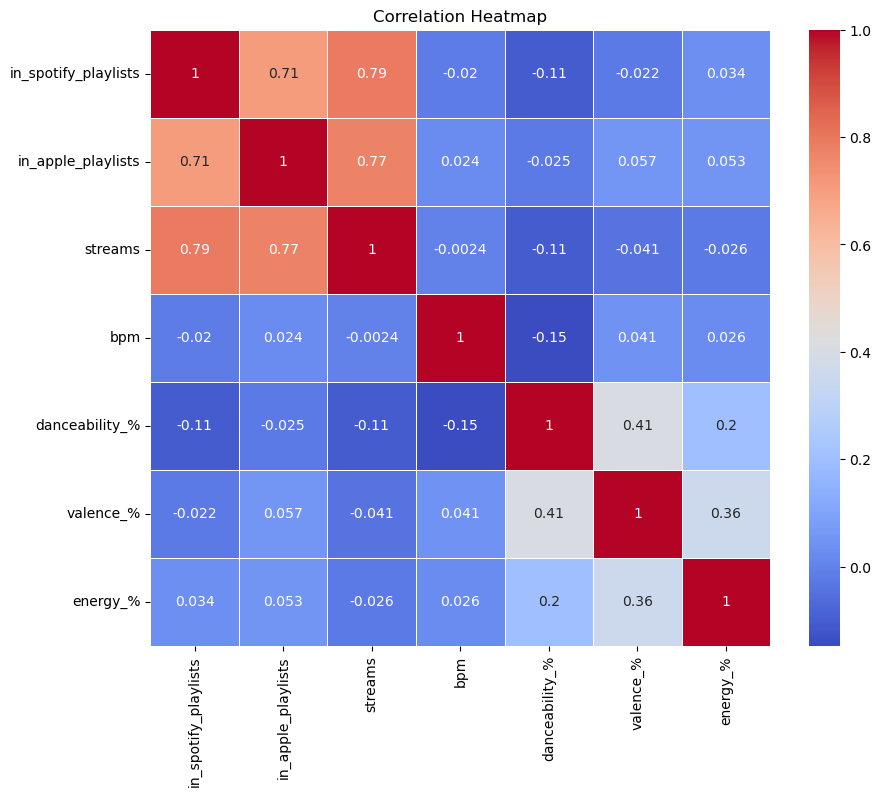

In [11]:
# Investigate the relationship between playlist inclusions and song attributes or streams
playlist_metrics = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%']]

# Calculate correlations between playlist metrics and song attributes or streams
correlations = playlist_metrics.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlations)


plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


> 2. Correlation Between Chart Metrics and Song Characteristics:

/tmp/ipykernel_20/2888907736.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Correlation Matrix for Chart Metrics:
                   in_spotify_charts  in_apple_charts  in_deezer_charts  \
in_spotify_charts           1.000000         0.552232          0.600205   
in_apple_charts             0.552232         1.000000          0.383668   
in_deezer_charts            0.600205         0.383668          1.000000   
streams                     0.245821         0.320234          0.228598   
bpm                         0.034713         0.030962          0.028036   
danceability_%              0.030071        -0.025204          0.070913   
valence_%                   0.035531         0.047733          0.076196   
energy_%                    0.081920         0.104828          0.094627   

                    streams       bpm  danceability_%  valence_%  energy_%  
in_spotify_charts  0.245821  0.034713        0.030071   0.035531  0.081920  
in_apple_charts    0.320234  0.030962       -0.025204   0.047733  0.104828  
in_deezer_charts   0.228598  0.028036        0.070913  

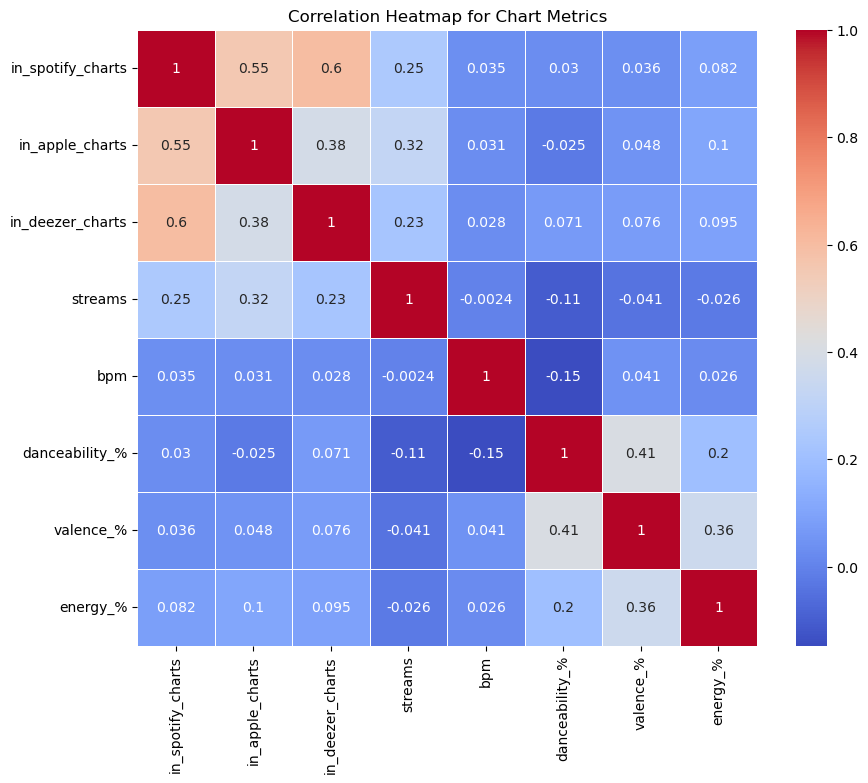

In [12]:
# Examine how the presence and rank on charts correlate with song characteristics
chart_metrics = df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%']]

# Calculate correlations between chart metrics and song characteristics
chart_correlations = chart_metrics.corr()

# Print the correlation matrix for chart metrics
print("Correlation Matrix for Chart Metrics:")
print(chart_correlations)

# Visualize the correlations using a heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(chart_correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for Chart Metrics")
plt.show()


**Artist and Stream Analysis**

In [13]:
# Group the data by artist_name and count the number of data(songs)
artist_song_counts = df['artist(s)_name'].value_counts()

# Display the artists/groups with the most songs
#top 10 only
most_songs = artist_song_counts.head(10)  
print("Artists/Groups with the Most Songs:")
print(most_songs)


Artists/Groups with the Most Songs:
Taylor Swift      34
The Weeknd        22
SZA               19
Bad Bunny         19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
Feid               8
BTS                8
Name: artist(s)_name, dtype: int64


<h2>Q: Does collaboration (measured by artist_count) affect song attributes and popularity?</h2>

> Song attributs
> - BPM
> -
<hr>

> Grouped analysis of song attributes by artist_count

In [14]:

grouped = df.groupby('artist_count').agg({'bpm': 'mean', 'danceability_%': 'mean', 'valence_%': 'mean', 'streams': 'sum'})
print(grouped)


                     bpm  danceability_%  valence_%       streams
artist_count                                                     
1             123.597956       64.172061  49.245315  3.329720e+11
2             121.767717       71.145669  53.933071  1.174701e+11
3             116.423529       71.294118  56.317647  3.241408e+10
4             133.600000       74.733333  55.333333  4.591594e+09
5              98.000000       77.800000  62.000000  7.240410e+08
6             108.666667       83.333333  66.666667  2.623994e+08
7             190.000000       62.500000  78.500000  6.781201e+08
8             102.000000       68.500000  62.000000  3.464423e+08


<h3>artist_count and BPM</h3> 

In [15]:
# Correlation between artist_count and BPM
correlation = df['artist_count'].corr(df['bpm'])
print("Correlation between artist_count and BPM:", correlation)


Correlation between artist_count and BPM: -0.03837538512333288


> There's a negative correlation between the number of artist and the BPM, which indicates a weak relationship between artist_count and BPM. As the number of artists increases, BPM tends to decrease slightly, but the effect is not significant.

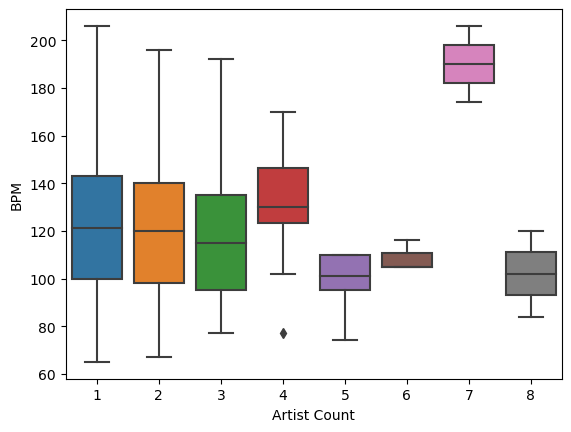

In [16]:
# Box plots to visualize the distribution of attributes by artist_count
sns.boxplot(x='artist_count', y='bpm', data=df)
plt.xlabel('Artist Count')
plt.ylabel('BPM')
plt.show()

<h3>artist_count and streams</h3> 

In [17]:
bpm_streams_corr = df['artist_count'].corr(df['streams'])
print("Correlation between artist_count and streams:", bpm_streams_corr)

Correlation between artist_count and streams: -0.13646347478241774


In [18]:

popularity_stats = df.groupby('artist_count')['streams'].agg(['mean', 'median'])

print('Find the middle ')
print(popularity_stats.sort_values(by='median', ascending=False)['median'])


popularity_stats.sort_values(by='mean', ascending=False)['mean']


Find the middle 
artist_count
7    339060067.5
1    333619963.0
2    249408543.5
3    231332117.0
8    173221173.5
4    159240673.0
5    133753727.0
6    120847157.0
Name: median, dtype: float64


artist_count
1    5.682117e+08
2    4.624808e+08
3    3.813421e+08
7    3.390601e+08
4    3.061062e+08
8    1.732212e+08
5    1.448082e+08
6    8.746645e+07
Name: mean, dtype: float64

As we move from songs with fewer artists (lower artist_count) to songs with more artists (higher artist_count), there are noticeable trends in popularity:

>On average, songs with 1 or 2 artists tend to have the highest mean and median stream counts. This suggests that songs with fewer artists are, on average, more popular in terms of streams.

While songs with a large number of artists can have some outliers that perform extremely well in terms of streams, songs with a single artist tend to have consistently high streaming numbers on average across a larger portion of the dataset.

<h2>Q: Other factors that may affect song popularity</h2>

**Liveness AnalysisAnalysis**

Liveness effect on streamLiveness effect on stream

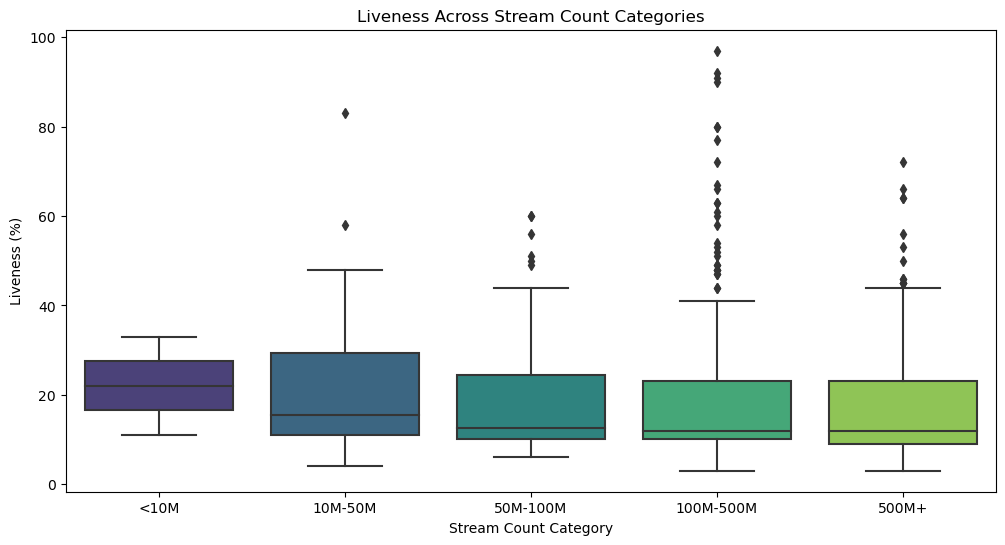

In [19]:
# Define bins for stream counts
stream_bins = [0, 10000000, 50000000, 100000000, 500000000, np.inf]  # Example bins

# Create labels for the bins
stream_labels = ['<10M', '10M-50M', '50M-100M', '100M-500M','500M+']

# Assign each song to a stream count category based on the bins
df['stream_category'] = pd.cut(df['streams'], bins=stream_bins, labels=stream_labels)

# Box plot to visualize liveness across stream count categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='stream_category', y='liveness_%', palette='viridis', order=stream_labels)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.title('Liveness Across Stream Count Categories')
plt.xlabel('Stream Count Category')
plt.ylabel('Liveness (%)')
plt.show()

In [20]:
# Correlation between liveness and streams
liveness_streams_corr = df['liveness_%'].corr(df['streams'])
print(f"Correlation between Liveness (%) and Streams: {liveness_streams_corr:.2f}")


Correlation between Liveness (%) and Streams: -0.05


In [21]:
# Fit a normal distribution to liveness data
from scipy.stats import norm
loc, scale = norm.fit(df['liveness_%'])

print(f"Estimated Mean: {loc}, Estimated Standard Deviation: {scale}")

Estimated Mean: 18.213011542497377, Estimated Standard Deviation: 13.704027741693038


In [22]:
from scipy.stats import describe
liveness_summary = describe(df['liveness_%'])

liveness_summary

DescribeResult(nobs=953, minmax=(3, 97), mean=18.213011542497377, variance=187.99764564797587, skewness=2.1009665081534723, kurtosis=5.678169033903242)